# Problem Statement:
To build a churn model based on the details of a bank's customers.

# Project Objective:
To identify the customers who are likely to churn on their bank account.

# 1. Loading The Bank Data To Generate DataFrame


In [1]:
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Exploratory Data Analysis :

In [2]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [3]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Key Observation from the above dataframe.info() result
Float : float64 type values

There are 2 float type attributes

    -Balance : Bank balance of the customer (numeric)
    -EstimatedSalary : Estimated Salary of the customer (numeric)
Integer : int64 type values

There are 9 integer type attributes

    -RowNumber : Row Numbers from 1 to 10000 (numberic)
    -CustomerId : Unique Ids for bank customer identification (numeric)
    -CreditScore : Credit score of the customer (numeric)
    -Age : Age of the customer (numeric)
    -Tenure : Number of years for which the customer has been with the bank (numeric)
    -NumOfProducts : Number of bank products the customer is utilising (numeric)
    -HasCrCard : Binary Flag for whether the customer holds a credit card with the bank or not
    -IsActiveMember : Binary Flag for whether the customer is an active member with the bank or not
    -Target Variable :
Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained
There are 3 attribute which are of string type

    -Surname: Customer's last name
    -Geography: The country from which the customer belongs (categorical: 'France','Spain','Germany')
    -Gender: Gender of the custome, (categorical: 'Male', 'Female')

In [4]:
#Remove customer IDs from the data set
df_new = df.iloc[:,1:]
df_new = df.iloc[:,2:]
df_new = df.iloc[:,3:]
#Convertin the predictor variable in a binary numeric variable

df_dummies = pd.get_dummies(df_new)
df_dummies.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


<AxesSubplot:>

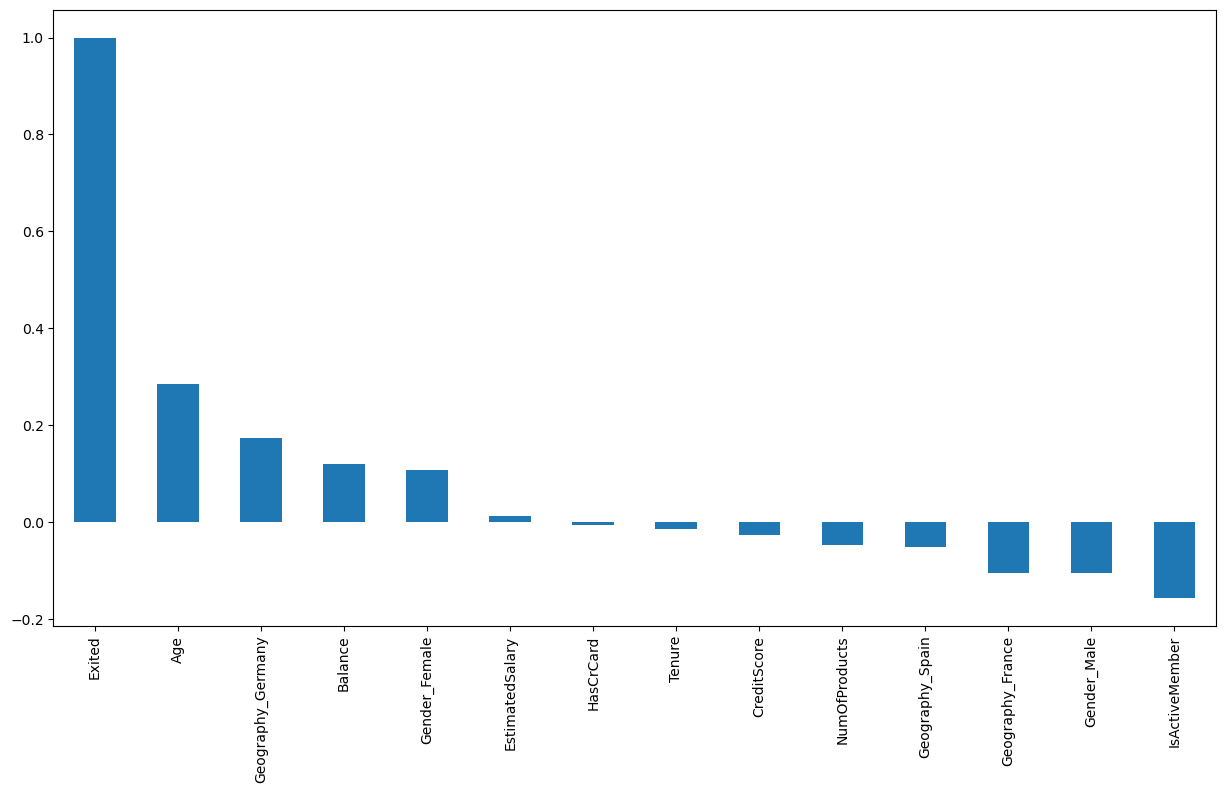

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
df_dummies.corr()["Exited"].sort_values(ascending = False).plot(kind='bar')

Age, Geography_Germany, Balance, Gender_Female and EstimatedSalary seem to be positively correlated with churn. 

While, IsActiveMember, Gender_Male, Geography_France, Geography_Spain, NumberOfProducts, CreditScore, Tenure and HasCrCard seem to be negatively correlated with churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

# Data Exploration


A.) Demographics

1. Gender Distribution - About 54.6% of the customers in our data set are male while the rest are female.

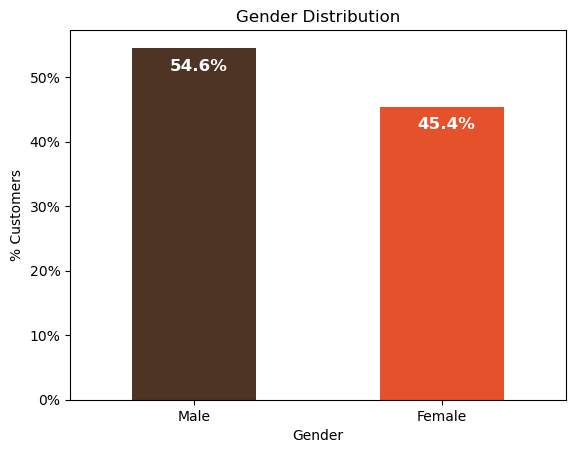

In [6]:
import matplotlib.ticker as mtick # For specifying the axes tick format
colors = ['#4D3425','#E4512B']
ax = (df['Gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')

ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

2. Age Distribution - Majority of the customer falls in the age group of 30 to 40, that goes to show that most of them are young professional.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers\xa0by\xa0their\xa0age')

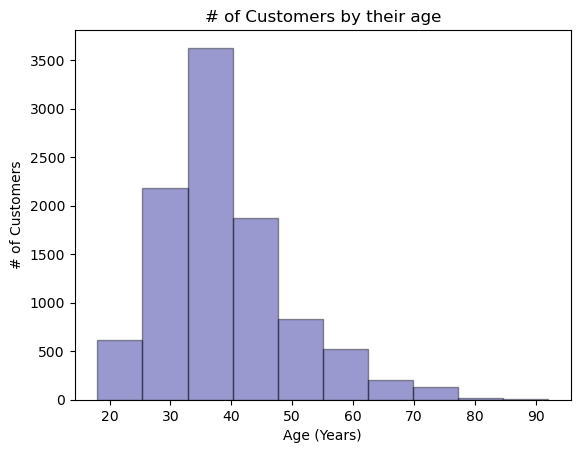

In [7]:
import seaborn as sns
ax = sns.distplot(df['Age'], hist=True, kde=False, 
             bins=int(50/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Age (Years)')
ax.set_title('# of Customers by their age')

B.) Geography - Half of the customers lives in France, while the remaining are split between Spain and Germany. Thus most of our customers in the data are french.

Text(0.5, 1.0, '% of Geography')

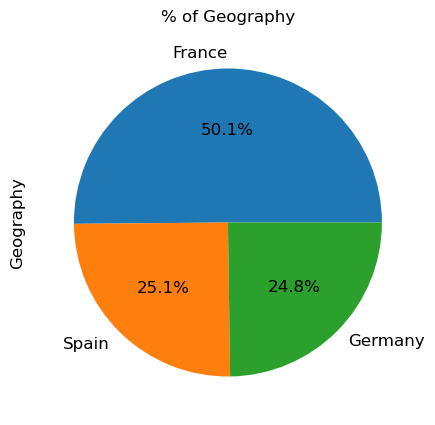

In [8]:
ax = (df['Geography'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['France', 'Spain','Germany'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Geography',fontsize = 12)
ax.set_title('% of Geography', fontsize = 12)


C.) Customer Account Information: 
1. Tenure - the majority of the customers have been with the bank company from 1 up to 10 years.

In [9]:
df['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

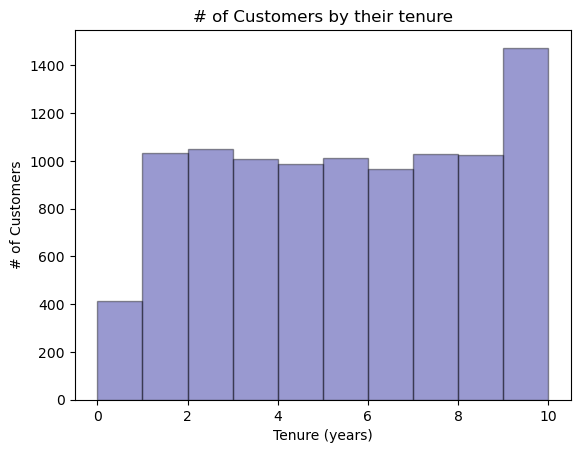

In [10]:
ax = sns.distplot(df['Tenure'], hist=True, kde=False, 
             bins=int(20/2), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (years)')
ax.set_title('# of Customers by their tenure')

2. Credit card ownership - among the customers, a majority (70%) of them have Credit Card.

In [11]:
df['HasCrCard'].describe()

count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64

Text(0.5, 1.0, '% of HasCrCard')

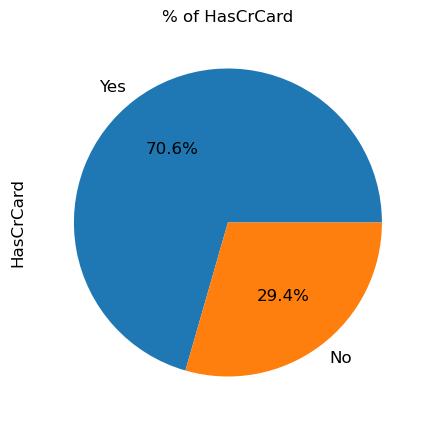

In [12]:
ax = (df['HasCrCard'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Yes', 'No'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('HasCrCard',fontsize = 12)
ax.set_title('% of HasCrCard', fontsize = 12)

3. Number of bank products - The majority of the customers are using 1 or 2 products. 

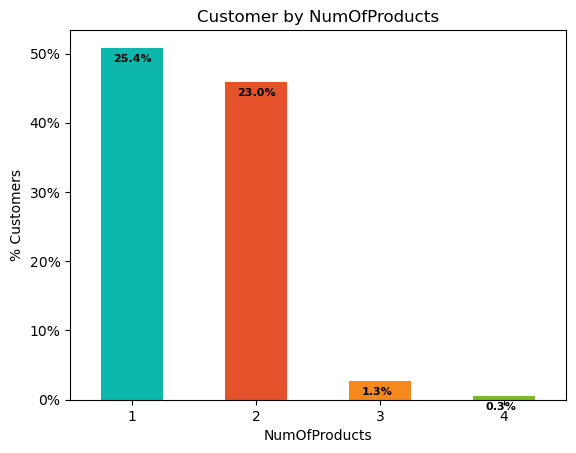

In [13]:
colors = ['#0CB7AC','#E4512B','#F6891D','#7ABA2D']
ax = (df['NumOfProducts'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('NumOfProducts')

ax.set_ylabel('% Customers')
ax.set_title('Customer by NumOfProducts')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.10, i.get_height()-2, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=8,
            color='black',
           weight = 'bold')

4. Active Member - 51.5% of the customers are active.

Text(0.5, 1.0, '% of ActiveMember')

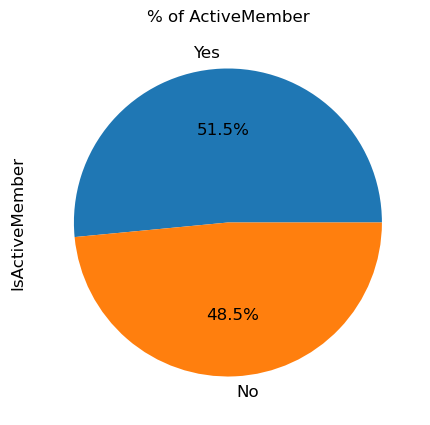

In [14]:
colors = ['#D2D0C1','#CD9494']
ax = (df['IsActiveMember'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Yes', 'No'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('IsActiveMember',fontsize = 12)
ax.set_title('% of ActiveMember', fontsize = 12)

C.) Churn rate

Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.

In our data, 79.6% of the customers do not churn.

Text(0.5, 1.0, '% of Churn')

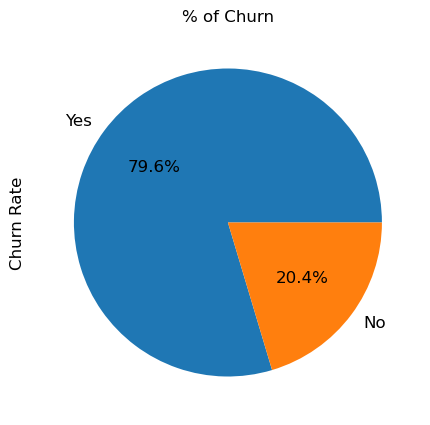

In [15]:

ax = (df['Exited'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Yes', 'No'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Churn Rate',fontsize = 12)
ax.set_title('% of Churn', fontsize = 12)

In [39]:
#Churn rate by country

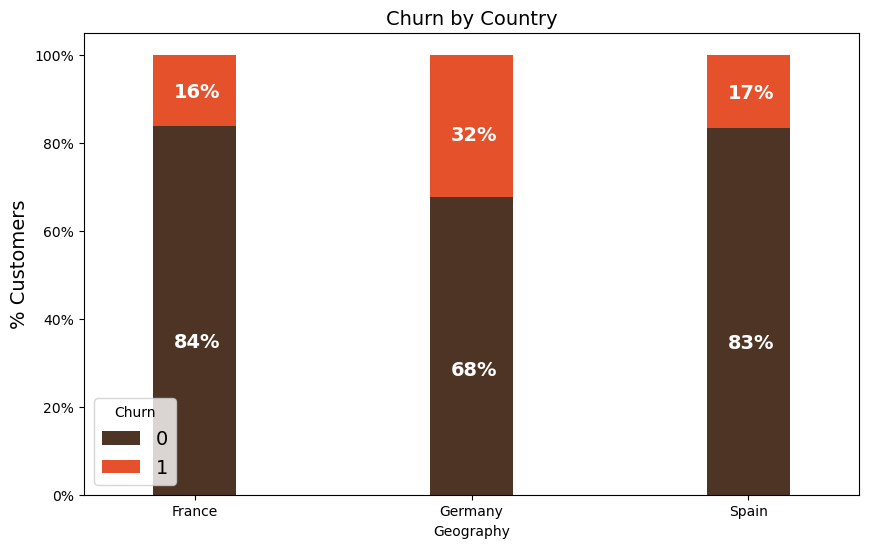

In [33]:
colors = ['#4D3425','#E4512B']
geography_churn = df.groupby(['Geography','Exited']).size().unstack()

ax = (geography_churn.T*100.0 / geography_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Country',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [ ]:
#Churn Rate by Age

Text(0.5, 1.0, 'Distribution of Age by churn')

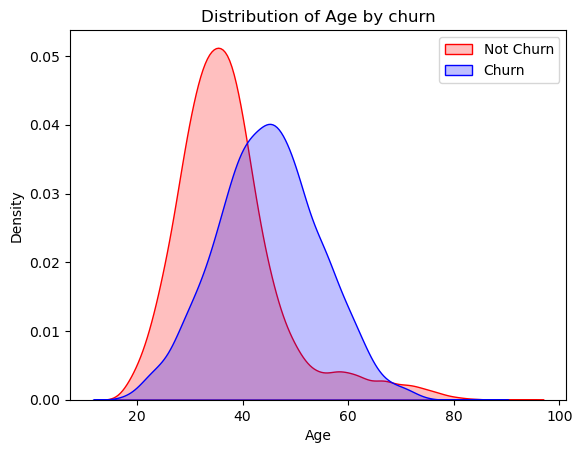

In [61]:
import seaborn as sns
ax = sns.kdeplot(df.Age[(df["Exited"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.Age[(df["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age by churn')

In [40]:
#Churn Rate by Balance

Text(0.5, 1.0, 'Distribution of balance by churn')

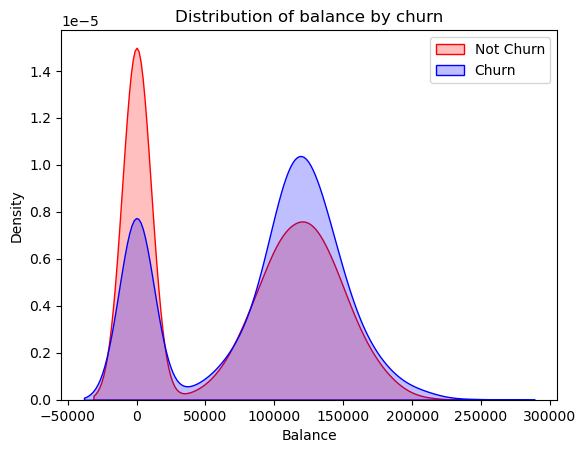

In [41]:
import seaborn as sns
ax = sns.kdeplot(df.Balance[(df["Exited"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.Balance[(df["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Balance')
ax.set_title('Distribution of balance by churn')


In [ ]:
#Churn Rate by EstimatedSalary

Text(0.5, 1.0, 'Distribution of EstimatedSalary by Churn')

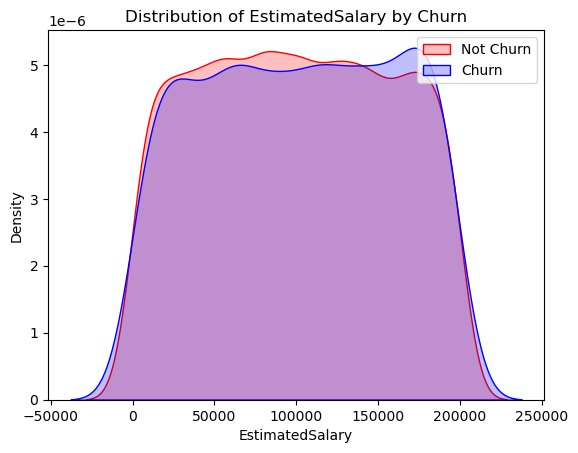

In [62]:
ax = sns.kdeplot(df.EstimatedSalary[(df["Exited"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.EstimatedSalary[(df["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('EstimatedSalary')
ax.set_title('Distribution of EstimatedSalary by Churn')

In [ ]:
#Churn rate by Gender

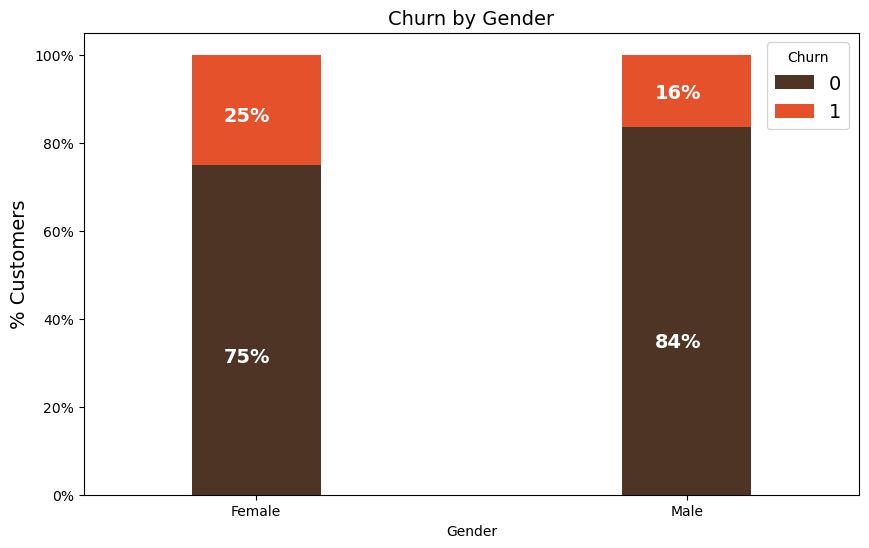

In [50]:
colors = ['#4D3425','#E4512B']
gender_churn = df.groupby(['Gender','Exited']).size().unstack()

ax = (gender_churn.T*100.0 / gender_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Gender',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [ ]:
#Churn Rate by CreditScore

Text(0.5, 1.0, 'Distribution of CreditScore by Churn')

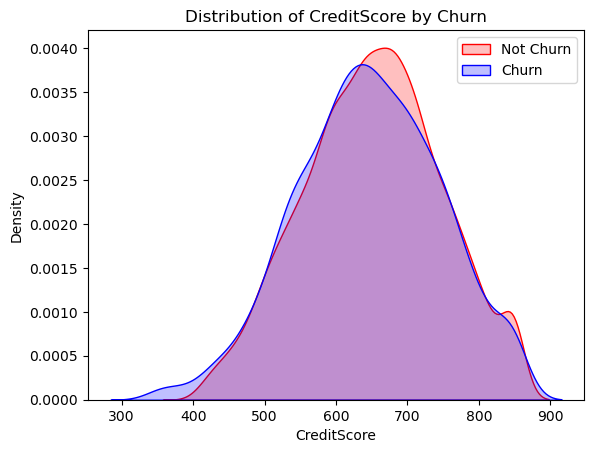

In [63]:
ax = sns.kdeplot(df.CreditScore[(df["Exited"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.CreditScore[(df["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('CreditScore')
ax.set_title('Distribution of CreditScore by Churn')

In [ ]:
#Churn Rate by ActiveMember

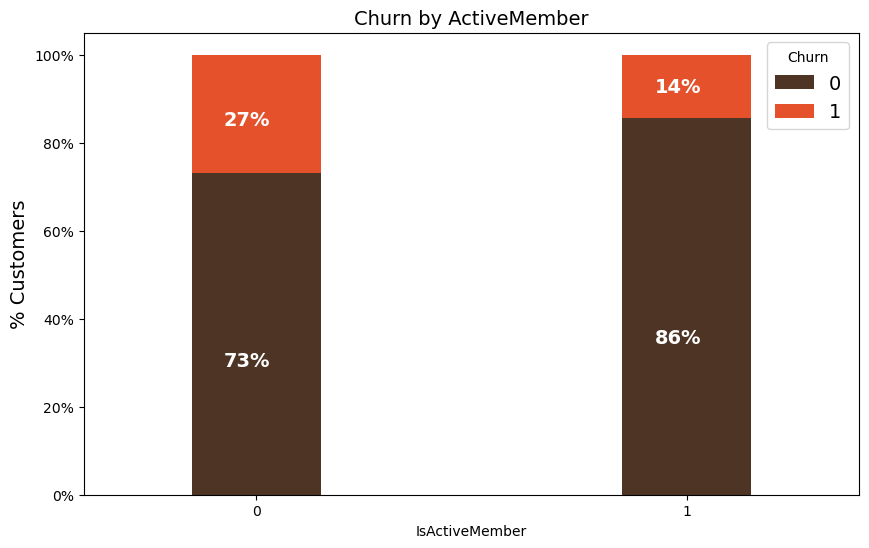

In [51]:
colors = ['#4D3425','#E4512B']
Activemember_churn = df.groupby(['IsActiveMember','Exited']).size().unstack()

ax = (Activemember_churn.T*100.0 / Activemember_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by ActiveMember',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [ ]:
#Churn Rate by NumberOfProducts

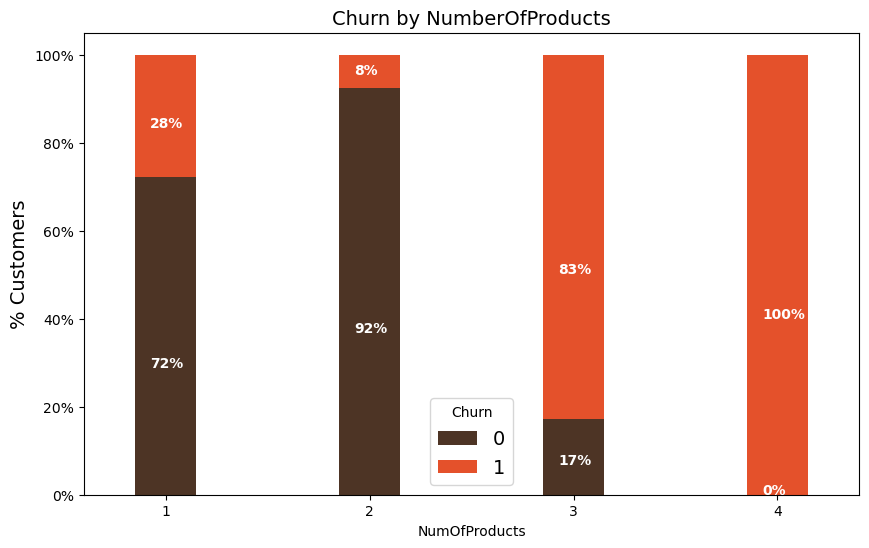

In [55]:
colors = ['#4D3425','#E4512B']
NumberOfProducts_churn = df.groupby(['NumOfProducts','Exited']).size().unstack()

ax = (NumberOfProducts_churn.T*100.0 / NumberOfProducts_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by NumberOfProducts',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)

In [ ]:
#Churn Rate by Tenure

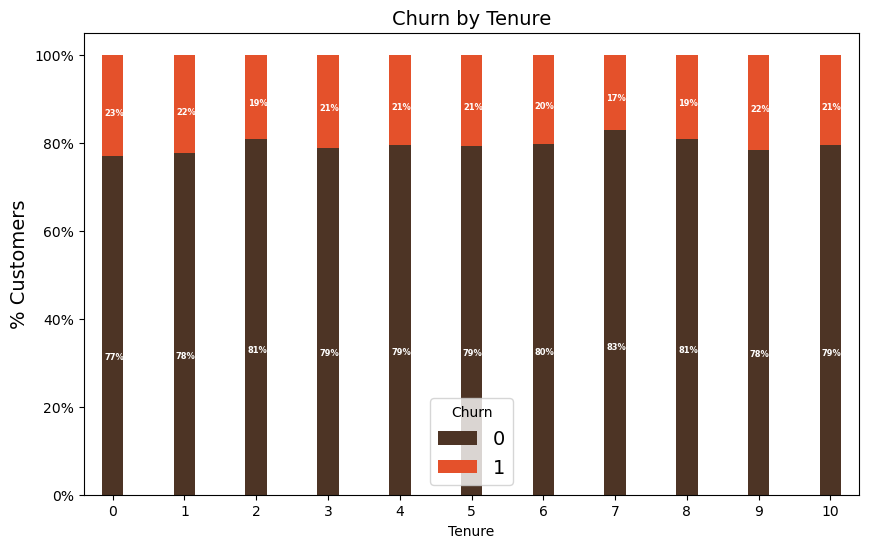

In [59]:
colors = ['#4D3425','#E4512B']
Tenure_churn = df.groupby(['Tenure','Exited']).size().unstack()

ax = (Tenure_churn.T*100.0 / Tenure_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Tenure',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.10*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 6)

In [ ]:
#Churn Rate by HasCrCard

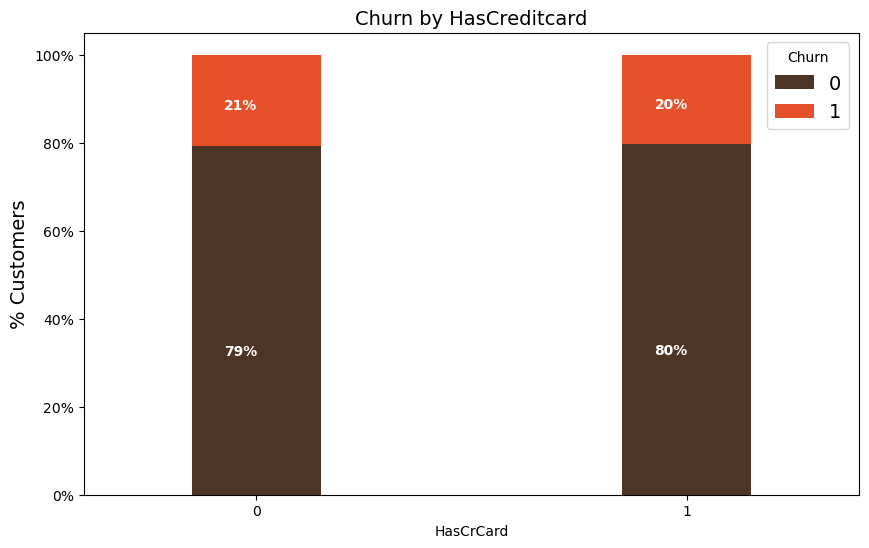

In [60]:
colors = ['#4D3425','#E4512B']
HasCrCard_churn = df.groupby(['HasCrCard','Exited']).size().unstack()

ax = (HasCrCard_churn.T*100.0 / HasCrCard_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by HasCreditcard',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)

# 3. Base model selection

After going through the above EDA we will develop some predictive models and compare them.

We will develop Logistic Regression, Random Forest and XG Boost

a. Logistic Regression

In [18]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Exited'].values
X = df_dummies.drop(columns = ['Exited'])

In [19]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [20]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8073333333333333

In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

prediction_test = model.predict(X_test)

print("Accuracy", accuracy_score(y_test, prediction_test))
print("Precision", precision_score(y_test, prediction_test, average="macro"))
print("Recall", recall_score(y_test, prediction_test, average="macro"))
print("\n\nClassification report \n")
print(classification_report(y_test, prediction_test))

Accuracy 0.8073333333333333
Precision 0.7175480769230769
Recall 0.5792960119422682


Classification report 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2378
           1       0.61      0.19      0.29       622

    accuracy                           0.81      3000
   macro avg       0.72      0.58      0.59      3000
weighted avg       0.78      0.81      0.76      3000



AxesSubplot(0.125,0.11;0.775x0.77)


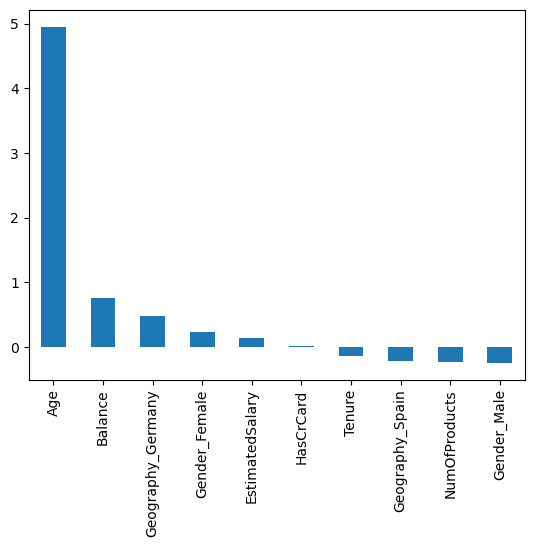

In [23]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.11;0.775x0.77)


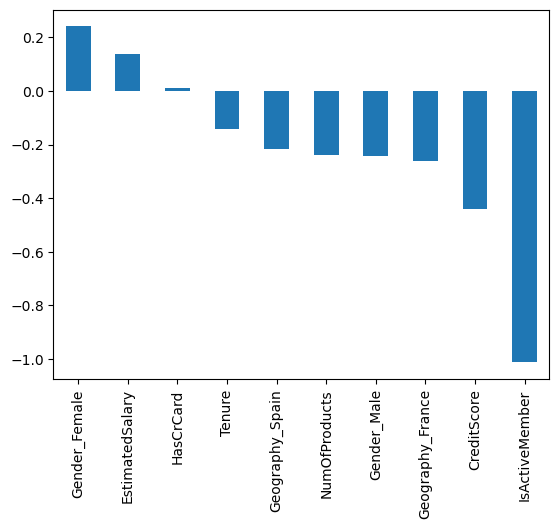

In [24]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

Observations

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

Similary to what we saw in our EDA, IsActiveMember has the most negative relationship with churn. While CreditScore, Geography_France, Gender_Male, NumberOfProducts, Geograph_Spain and Tenure also reduces chance of chrun as predicted by logistic regressions. 

Lastly, Age can lead to higher chance rates. While Balance, Geography_Germany, Gender_Female, EstimatedSalary, and HasCrCard also postiverelationship with churn.

b. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

prediction_test = model_rf.predict(X_test)

print("Accuracy", accuracy_score(y_test, prediction_test))
print("Precision", precision_score(y_test, prediction_test, average="macro"))
print("Recall", recall_score(y_test, prediction_test, average="macro"))
print("\n\nClassification report \n")
print(classification_report(y_test, prediction_test))

Accuracy 0.8593333333333333
Precision 0.8176738567868842
Recall 0.7147891037619767


Classification report 

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2378
           1       0.76      0.47      0.58       622

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



<AxesSubplot:>

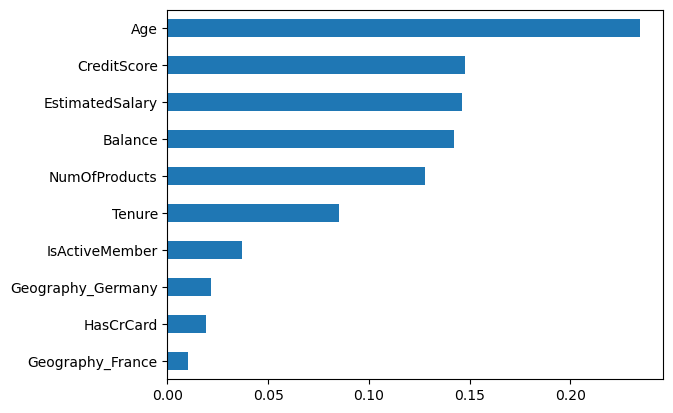

In [27]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Observations:

From random forest algorithm, Age is the most important predictor to predict churn, following by EstimatedSalary, CreditScore, Balance and NumberOfProducts.

The results from random forest is partially similar to that of the logistic regression and in line to what we had expected from our EDA.

c. XG Boost

In [28]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
model_xg.score(X_test, y_test)

0.8576666666666667

Results have improved but do not beat the RandomForest model.

# Conclusion

Randomforest model is the best model for our prediction. The score we got was 0.8593333333333333. 

The churn customer profile we could identify is the following: 
- Age between 30 to 50
- Credit score between 550 - 750
- Estimated salary from low to high 
- Balance from low to high
- Number Of Products : 1, 3 or 4 products. 
- Geography : Germany